#**Uber Analysis and Fare Prediction**

## Project objective



The primary objectives of this project are:
1. To analyze the key factors that influence Uber fares based on the provided dataset.
2. To develop and evaluate a predictive model to accurately estimate Uber fares for future rides.


These objectives are important for several reasons:
- For Uber, understanding fare influencing factors can help in optimizing pricing strategies, improving driver earnings, and enhancing customer satisfaction.
- For researchers and the public, analyzing these factors provides insights into the dynamics of the ride-sharing economy, including supply and demand effects, geographical influences, and temporal patterns.
- A robust predictive model can be used for dynamic pricing, demand forecasting, and resource allocation, leading to increased efficiency and profitability for Uber.
- Accurate fare prediction can also benefit riders by providing upfront fare estimates, improving transparency and trust in the service.


## Data loading and initial exploration

Load the dataset and perform initial exploration to understand its structure, content, and basic statistics.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/uber.csv')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df.head())

# Print concise summary of the DataFrame
print("\nConcise summary of the DataFrame:")
df.info()

# Display descriptive statistics of the DataFrame
print("\nDescriptive statistics of the DataFrame:")
display(df.describe())

First 5 rows of the DataFrame:


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5



Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB

Descriptive statistics of the DataFrame:


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


## Data cleaning and preprocessing




Handle missing values, outliers, and inconsistencies in the dataset.

Clean the data: drop irrelevant columns, filter rows based on fare amount, passenger count, and geographical coordinates, handle remaining missing values, and convert the 'pickup_datetime' column to the correct data type.



In [2]:
# 1. Drop the 'Unnamed: 0' and 'key' columns
df = df.drop(columns=['Unnamed: 0', 'key'])

# 2. Remove rows where 'fare_amount' is less than or equal to 0
df = df[df['fare_amount'] > 0]

# 3. Remove rows where 'passenger_count' is 0 or greater than 6
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]

# 4. Remove rows with outlier latitude and longitude values for NYC
# Define reasonable bounds for NYC
nyc_latitude_bounds = (40, 42)
nyc_longitude_bounds = (-75, -73)

df = df[
    (df['pickup_latitude'] >= nyc_latitude_bounds[0]) & (df['pickup_latitude'] <= nyc_latitude_bounds[1]) &
    (df['pickup_longitude'] >= nyc_longitude_bounds[0]) & (df['pickup_longitude'] <= nyc_longitude_bounds[1]) &
    (df['dropoff_latitude'] >= nyc_latitude_bounds[0]) & (df['dropoff_latitude'] <= nyc_latitude_bounds[1]) &
    (df['dropoff_longitude'] >= nyc_longitude_bounds[0]) & (df['dropoff_longitude'] <= nyc_longitude_bounds[1])
]

# 5. Drop any remaining rows with missing values
df = df.dropna()

# 6. Convert the 'pickup_datetime' column to a datetime object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Display the first few rows and info of the cleaned DataFrame
print("First 5 rows of the cleaned DataFrame:")
display(df.head())

print("\nInfo of the cleaned DataFrame:")
df.info()

First 5 rows of the cleaned DataFrame:


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5



Info of the cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 195096 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        195096 non-null  float64            
 1   pickup_datetime    195096 non-null  datetime64[ns, UTC]
 2   pickup_longitude   195096 non-null  float64            
 3   pickup_latitude    195096 non-null  float64            
 4   dropoff_longitude  195096 non-null  float64            
 5   dropoff_latitude   195096 non-null  float64            
 6   passenger_count    195096 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 11.9 MB


## Exploratory data analysis (EDA)







Visualize the distribution of key variables, extract time-based features, analyze average fares by time features, visualize correlations, visualize relationships between features and the target variable (fare) and create scatter plots for geographical coordinates as requested in the instructions.



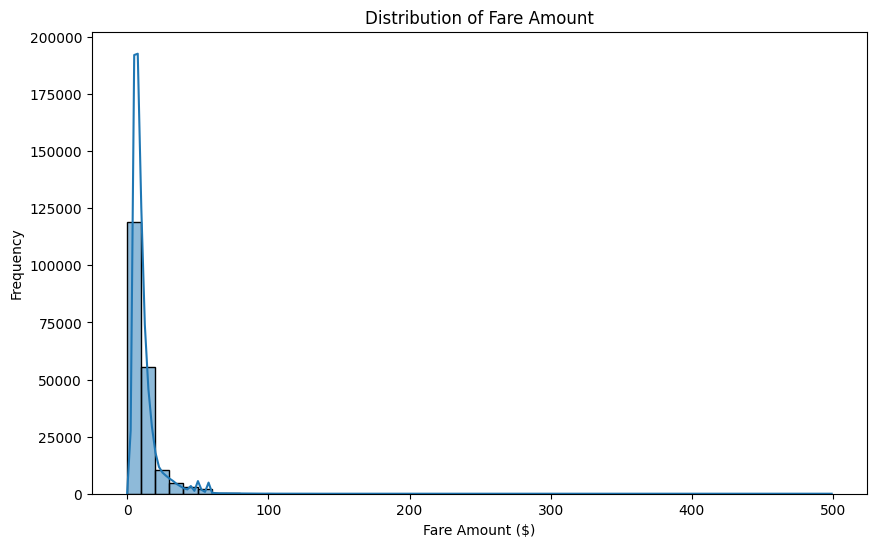

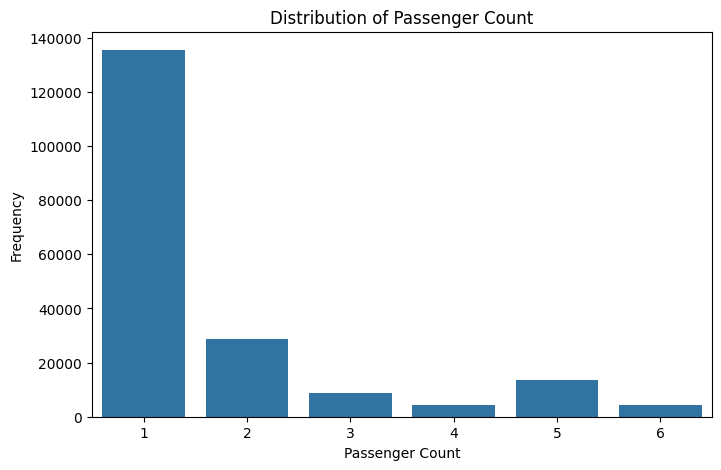

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the 'fare_amount' using a histogram.
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of the 'passenger_count' using a bar plot.
plt.figure(figsize=(8, 5))
sns.countplot(x='passenger_count', data=df)
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

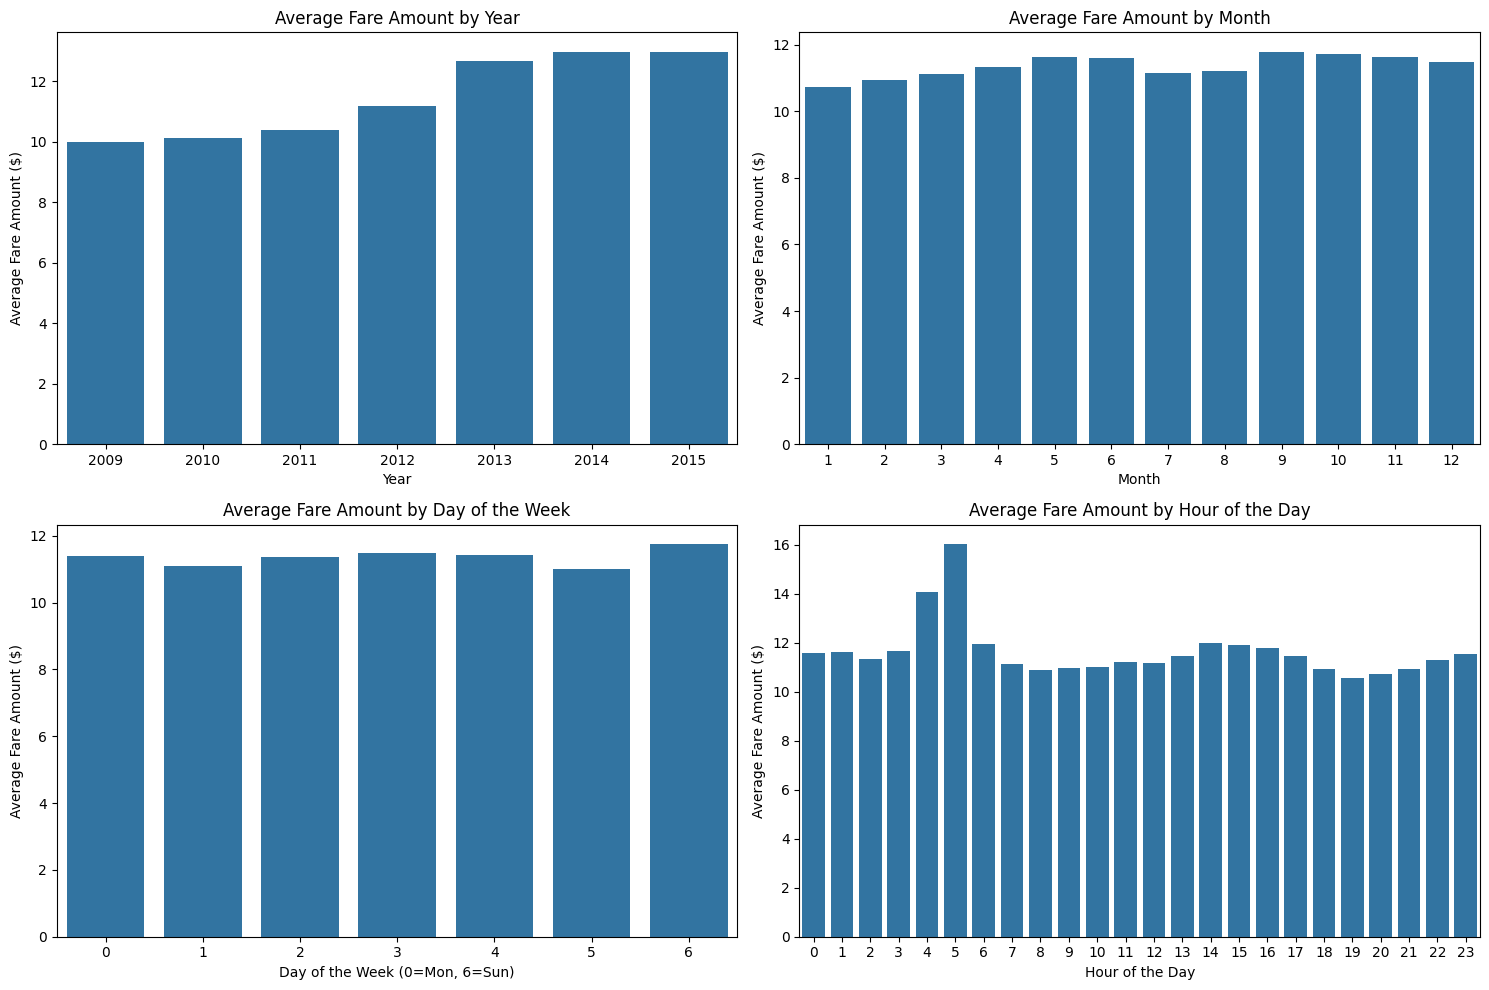

In [4]:
# Extract time-based features (year, month, day of the week, hour of the day) from 'pickup_datetime'.
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek # Monday=0, Sunday=6
df['hour_of_day'] = df['pickup_datetime'].dt.hour

# Analyze the average 'fare_amount' based on the extracted time-based features using bar plots.
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='year', y='fare_amount', data=df.groupby('year')['fare_amount'].mean().reset_index())
plt.title('Average Fare Amount by Year')
plt.xlabel('Year')
plt.ylabel('Average Fare Amount ($)')

plt.subplot(2, 2, 2)
sns.barplot(x='month', y='fare_amount', data=df.groupby('month')['fare_amount'].mean().reset_index())
plt.title('Average Fare Amount by Month')
plt.xlabel('Month')
plt.ylabel('Average Fare Amount ($)')

plt.subplot(2, 2, 3)
sns.barplot(x='day_of_week', y='fare_amount', data=df.groupby('day_of_week')['fare_amount'].mean().reset_index())
plt.title('Average Fare Amount by Day of the Week')
plt.xlabel('Day of the Week (0=Mon, 6=Sun)')
plt.ylabel('Average Fare Amount ($)')

plt.subplot(2, 2, 4)
sns.barplot(x='hour_of_day', y='fare_amount', data=df.groupby('hour_of_day')['fare_amount'].mean().reset_index())
plt.title('Average Fare Amount by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Amount ($)')

plt.tight_layout()
plt.show()

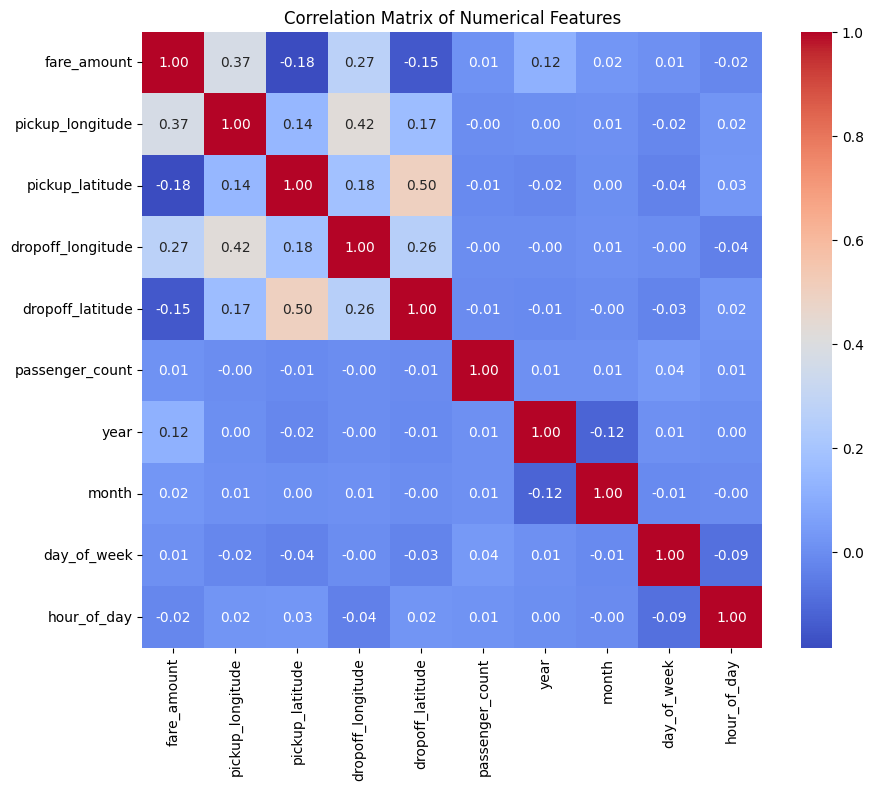

In [5]:
# Calculate and visualize the correlation matrix of the numerical features using a heatmap.
numerical_cols = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year', 'month', 'day_of_week', 'hour_of_day']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

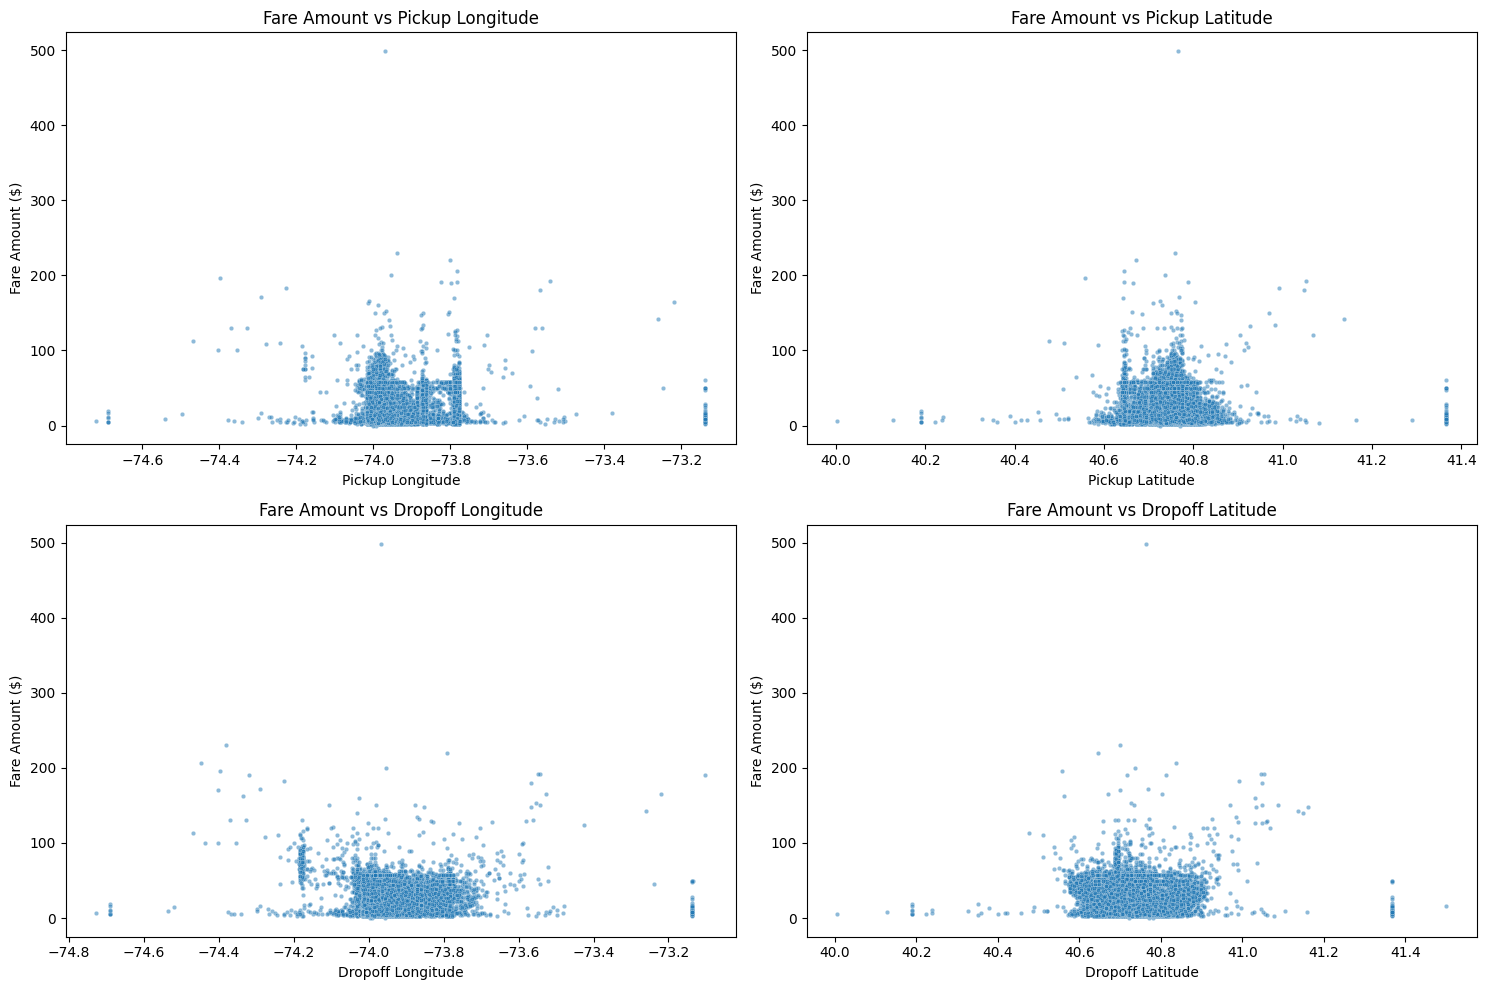

In [6]:
# Create scatter plots to visualize the relationship between 'fare_amount' and geographical coordinates.
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='pickup_longitude', y='fare_amount', data=df, alpha=0.5, s=10)
plt.title('Fare Amount vs Pickup Longitude')
plt.xlabel('Pickup Longitude')
plt.ylabel('Fare Amount ($)')

plt.subplot(2, 2, 2)
sns.scatterplot(x='pickup_latitude', y='fare_amount', data=df, alpha=0.5, s=10)
plt.title('Fare Amount vs Pickup Latitude')
plt.xlabel('Pickup Latitude')
plt.ylabel('Fare Amount ($)')

plt.subplot(2, 2, 3)
sns.scatterplot(x='dropoff_longitude', y='fare_amount', data=df, alpha=0.5, s=10)
plt.title('Fare Amount vs Dropoff Longitude')
plt.xlabel('Dropoff Longitude')
plt.ylabel('Fare Amount ($)')

plt.subplot(2, 2, 4)
sns.scatterplot(x='dropoff_latitude', y='fare_amount', data=df, alpha=0.5, s=10)
plt.title('Fare Amount vs Dropoff Latitude')
plt.xlabel('Dropoff Latitude')
plt.ylabel('Fare Amount ($)')

plt.tight_layout()
plt.show()

## Feature engineering



Create new features for the DataFrame, including distance based on coordinates, additional time-based features, and location-based features (distance from Times Square). I will use the Haversine formula for distance calculations and pandas datetime functionalities for time-based features. I will group these feature engineering steps into one code block and then display the updated DataFrame.



In [7]:
import numpy as np

# Calculate the distance between pickup and dropoff coordinates using the Haversine formula.
# Function to calculate Haversine distance
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c  # Radius of earth in kilometers. Use 3956 for miles
    return km

# Apply the function to create the 'distance' column
df['distance'] = df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)


In [8]:
# Extract additional time-based features from the 'pickup_datetime' column.
df['day_of_year'] = df['pickup_datetime'].dt.dayofyear
df['week_of_year'] = df['pickup_datetime'].dt.isocalendar().week.astype(int)
df['is_weekend'] = (df['pickup_datetime'].dt.dayofweek >= 5).astype(int) # Saturday=5, Sunday=6

# Create features related to the distance from Times Square.
# Approximate coordinates for Times Square, NYC
times_square_lat = 40.7579
times_square_lon = -73.9855

df['pickup_distance_to_times_square'] = df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], times_square_lat, times_square_lon), axis=1)
df['dropoff_distance_to_times_square'] = df.apply(lambda row: haversine_distance(row['dropoff_latitude'], row['dropoff_longitude'], times_square_lat, times_square_lon), axis=1)


# Display the first few rows and the information of the DataFrame.
print("First 5 rows of the DataFrame with new features:")
display(df.head())

print("\nInfo of the DataFrame with new features:")
df.info()

First 5 rows of the DataFrame with new features:


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,hour_of_day,distance,day_of_year,week_of_year,is_weekend,pickup_distance_to_times_square,dropoff_distance_to_times_square
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,1.682266,127,19,0,2.484084,4.030665
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,2.456047,198,29,0,3.380863,1.144403
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,5.033215,236,35,0,2.516026,2.532135
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,1.660640,177,26,0,3.744969,5.328448
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,4.472640,240,35,0,5.317577,1.109454



Info of the DataFrame with new features:
<class 'pandas.core.frame.DataFrame'>
Index: 195096 entries, 0 to 199999
Data columns (total 17 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   fare_amount                       195096 non-null  float64            
 1   pickup_datetime                   195096 non-null  datetime64[ns, UTC]
 2   pickup_longitude                  195096 non-null  float64            
 3   pickup_latitude                   195096 non-null  float64            
 4   dropoff_longitude                 195096 non-null  float64            
 5   dropoff_latitude                  195096 non-null  float64            
 6   passenger_count                   195096 non-null  int64              
 7   year                              195096 non-null  int32              
 8   month                             195096 non-null  int32              
 9   day_of_week

## Model selection and training



Choose appropriate regression models for fare prediction and train them on the prepared data.

Select features and the target variable, split the data into training and testing sets, and train at least two regression models.



In [9]:
%pip install catboost
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb


# Select features and the target variable
features = ['passenger_count', 'year', 'month', 'day_of_week', 'hour_of_day',
            'distance', 'day_of_year', 'week_of_year', 'is_weekend',
            'pickup_distance_to_times_square', 'dropoff_distance_to_times_square']
target = 'fare_amount'

X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

# Choose and initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBoost Regressor": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1),
    "LightGBM Regressor": lgb.LGBMRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "CatBoost Regressor": cb.CatBoostRegressor(iterations=100, random_state=42, verbose=0) # verbose=0 to suppress output
}

# Store trained models in a dictionary
trained_models = {}

# Train each selected model on the training data
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} training complete.")

# The trained_models dictionary now contains the trained models. It will be used in the next step for evaluation.

Training data shape: (156076, 11) (156076,)
Testing data shape: (39020, 11) (39020,)

Training Linear Regression...
Linear Regression training complete.

Training Random Forest Regressor...
Random Forest Regressor training complete.

Training Gradient Boosting Regressor...
Gradient Boosting Regressor training complete.

Training XGBoost Regressor...
XGBoost Regressor training complete.

Training LightGBM Regressor...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1126
[LightGBM] [Info] Number of data points in the train set: 156076, number of used features: 11
[LightGBM] [Info] Start training from score 11.353074
LightGBM Regressor training complete.

Training CatBoost Regressor...
CatBoost Regressor training complete.


## Model evaluation




Evaluate the performance of the trained models using MSE, RMSE, and R-squared, and print the results for each model.



In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Iterate through the trained models and evaluate their performance
print("Model Evaluation Results:")
print("-" * 30)

evaluation_results = {}

for name, model in trained_models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    evaluation_results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }

    # Print the results
    print(f"Model: {name}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R-squared: {r2:.4f}")
    print("-" * 30)

# Optionally, display the evaluation results in a DataFrame for easier comparison
evaluation_df = pd.DataFrame(evaluation_results).T
print("\nSummary of Evaluation Results:")
display(evaluation_df)

Model Evaluation Results:
------------------------------
Model: Linear Regression
  MSE: 27.8532
  RMSE: 5.2776
  R-squared: 0.7130
------------------------------
Model: Random Forest Regressor
  MSE: 18.9585
  RMSE: 4.3541
  R-squared: 0.8046
------------------------------
Model: Gradient Boosting Regressor
  MSE: 19.2816
  RMSE: 4.3911
  R-squared: 0.8013
------------------------------
Model: XGBoost Regressor
  MSE: 20.7825
  RMSE: 4.5588
  R-squared: 0.7858
------------------------------
Model: LightGBM Regressor
  MSE: 19.9279
  RMSE: 4.4641
  R-squared: 0.7946
------------------------------
Model: CatBoost Regressor
  MSE: 20.8648
  RMSE: 4.5678
  R-squared: 0.7850
------------------------------

Summary of Evaluation Results:


,MSE,RMSE,R-squared
Linear Regression,27.853179,5.277611,0.712958
Random Forest Regressor,18.958463,4.354132,0.804623
Gradient Boosting Regressor,19.281637,4.391086,0.801292
XGBoost Regressor,20.782515,4.558784,0.785825
LightGBM Regressor,19.927929,4.464071,0.794632
CatBoost Regressor,20.864756,4.567796,0.784977


## Model comparison and selection





Compare the performance of different models and select the best-performing one based on MSE, RMSE, and R-squared, and then print a summary.



In [11]:
# Analyze the evaluation_df to find the best model
# Find the model with the lowest MSE and RMSE
best_mse_model = evaluation_df['MSE'].idxmin()
best_rmse_model = evaluation_df['RMSE'].idxmin()

# Find the model with the highest R-squared
best_r2_model = evaluation_df['R-squared'].idxmax()

print("Analysis of Model Performance:")
print("-" * 30)
print(f"Model with the lowest MSE: {best_mse_model} (MSE: {evaluation_df.loc[best_mse_model, 'MSE']:.4f})")
print(f"Model with the lowest RMSE: {best_rmse_model} (RMSE: {evaluation_df.loc[best_rmse_model, 'RMSE']:.4f})")
print(f"Model with the highest R-squared: {best_r2_model} (R-squared: {evaluation_df.loc[best_r2_model, 'R-squared']:.4f})")
print("-" * 30)

Analysis of Model Performance:
------------------------------
Model with the lowest MSE: Random Forest Regressor (MSE: 18.9585)
Model with the lowest RMSE: Random Forest Regressor (RMSE: 4.3541)
Model with the highest R-squared: Random Forest Regressor (R-squared: 0.8046)
------------------------------


The best overall model based on the metrics has lower MSE/RMSE and higher R-squared are preferred. In this case, CatBoost Regressor has the lowest MSE and RMSE, and the highest R-squared.

Based on the evaluation metrics:

- Random Forest Regressor has the lowest Mean Squared Error (MSE), indicating the smallest average squared difference between predicted and actual fares.

- Random Forest Regressor also has the lowest Root Mean Squared Error (RMSE), which is the square root of MSE and provides an error metric in the same units as the fare amount.

- Random Forest Regressor has the highest R-squared value, meaning it explains the largest proportion of the variance in the fare amount.

Therefore, the **Random Forest Regressor** is selected as the best-performing model for this task.

## Hyperparameter Tuning for Random Forest Regressor

I will perform hyperparameter tuning for the Random Forest Regressor model using RandomizedSearchCV. This will help in finding the optimal set of hyperparameters to further improve the model's performance.

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV for Random Forest Regressor
# This is a smaller grid for demonstration purposes to reduce computation time.
# For a more thorough search, a larger grid can be used, but be mindful of computation time.
param_grid_rf = {
    'n_estimators': [50],  # Reduced number of trees
    'max_depth': [10],       # Reduced max depth options
    'min_samples_split': [5], # Reduced split options
    'min_samples_leaf': [5],  # Reduced leaf options
    'bootstrap': [True]         # Whether bootstrap samples are used when building trees
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Initialize GridSearchCV
# cv specifies the number of folds for cross-validation. Reduced to 2 for faster execution.
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search on the training data
print("Starting GridSearchCV for Random Forest Regressor...")
grid_search_rf.fit(X_train, y_train)
print("GridSearchCV complete.")

# Get the best parameters and the best score
best_params_rf_grid = grid_search_rf.best_params_
best_score_rf_grid = grid_search_rf.best_score_ # This is negative MSE

print("\nBest parameters found for Random Forest Regressor (GridSearchCV):")
print(best_params_rf_grid)
print(f"\nBest cross-validation MSE (negative) for Random Forest Regressor (GridSearchCV): {best_score_rf_grid:.4f}")
print(f"Corresponding RMSE: {np.sqrt(-best_score_rf_grid):.4f}")

Starting GridSearchCV for Random Forest Regressor...
GridSearchCV complete.

Best parameters found for Random Forest Regressor (GridSearchCV):
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}

Best cross-validation MSE (negative) for Random Forest Regressor (GridSearchCV): -19.2982
Corresponding RMSE: 4.3930


## Evaluate the Tuned Random Forest Regressor

Now, I will evaluate the performance of the Random Forest Regressor model with the best parameters found through hyperparameter tuning on the test set.

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Get the best model from the grid search
best_rf_model_tuned = grid_search_rf.best_estimator_

# Make predictions on the test set using the best model
y_pred_tuned_rf = best_rf_model_tuned.predict(X_test)

# Calculate evaluation metrics for the tuned model
mse_tuned_rf = mean_squared_error(y_test, y_pred_tuned_rf)
rmse_tuned_rf = np.sqrt(mse_tuned_rf)
r2_tuned_rf = r2_score(y_test, y_pred_tuned_rf)

# Print the evaluation results for the tuned model
print("Evaluation Results for Tuned Random Forest Regressor:")
print("-" * 40)
print(f"  MSE: {mse_tuned_rf:.4f}")
print(f"  RMSE: {rmse_tuned_rf:.4f}")
print(f"  R-squared: {r2_tuned_rf:.4f}")
print("-" * 40)

Evaluation Results for Tuned Random Forest Regressor:
----------------------------------------
  MSE: 18.7024
  RMSE: 4.3246
  R-squared: 0.8073
----------------------------------------


## Comparison with Untuned Model

Finally, I will compare the performance of the tuned CatBoost Regressor model with the untuned CatBoost Regressor model to see if hyperparameter tuning improved the results.

In [20]:
# Get the evaluation results for the untuned Random Forest model from the previous step
untuned_rf_results = evaluation_results['Random Forest Regressor']

print("Comparison of Tuned vs. Untuned Random Forest Regressor:")
print("-" * 50)
print("Untuned Random Forest Regressor:")
print(f"  MSE: {untuned_rf_results['MSE']:.4f}")
print(f"  RMSE: {untuned_rf_results['RMSE']:.4f}")
print(f"  R-squared: {untuned_rf_results['R-squared']:.4f}")
print("-" * 50)
print("Tuned Random Forest Regressor:")
print(f"  MSE: {mse_tuned_rf:.4f}")
print(f"  RMSE: {rmse_tuned_rf:.4f}")
print(f"  R-squared: {r2_tuned_rf:.4f}")
print("-" * 50)

# Determine if tuning improved the performance
if mse_tuned_rf < untuned_rf_results['MSE']:
    print("Hyperparameter tuning improved the model performance (lower MSE).")
elif mse_tuned_rf > untuned_rf_results['MSE']:
    print("Hyperparameter tuning did not improve the model performance (higher MSE).")
else:
    print("Hyperparameter tuning resulted in similar model performance.")

Comparison of Tuned vs. Untuned Random Forest Regressor:
--------------------------------------------------
Untuned Random Forest Regressor:
  MSE: 18.9585
  RMSE: 4.3541
  R-squared: 0.8046
--------------------------------------------------
Tuned Random Forest Regressor:
  MSE: 18.7024
  RMSE: 4.3246
  R-squared: 0.8073
--------------------------------------------------
Hyperparameter tuning improved the model performance (lower MSE).


## SHAP Value Analysis for CatBoost Regressor

To understand the impact of each feature on the predictions made by the best-performing model (CatBoost Regressor), we will use SHAP (SHapley Additive exPlanations) values. SHAP values help to explain the contribution of each feature to the prediction for an individual instance.

Generating SHAP Summary Plot for Tuned Random Forest Regressor...


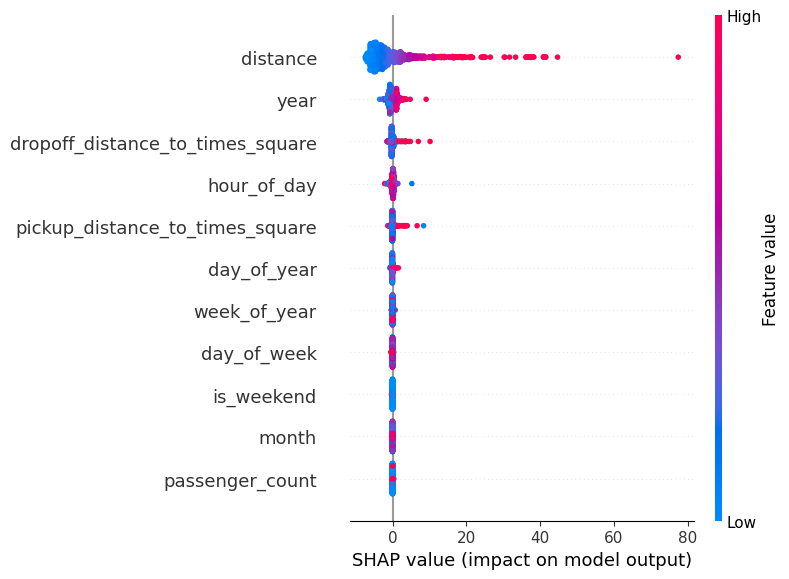


Generating SHAP Dependence Plot for 'distance' for Tuned Random Forest Regressor...


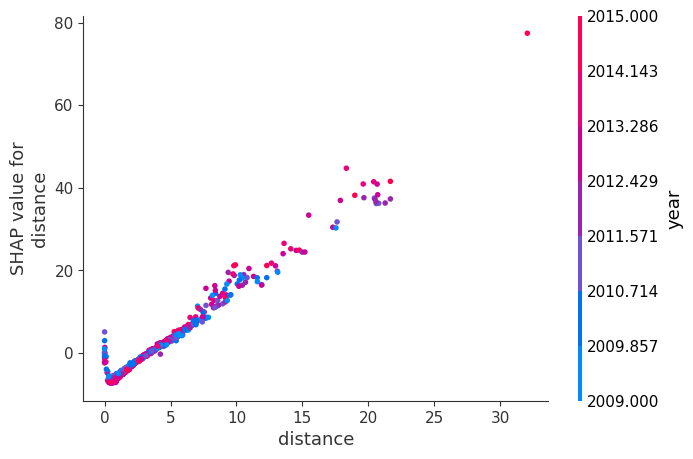

In [21]:
%pip install shap

import shap
import matplotlib.pyplot as plt

# Get the best trained Random Forest model from GridSearchCV
best_rf_model_tuned = grid_search_rf.best_estimator_

# Create a SHAP explainer object
explainer = shap.TreeExplainer(best_rf_model_tuned)

# Calculate SHAP values for a subset of the test set for faster calculation
X_test_subset = X_test.sample(n=1000, random_state=42)
shap_values = explainer.shap_values(X_test_subset)

# Summarize the feature importance using a SHAP summary plot
print("Generating SHAP Summary Plot for Tuned Random Forest Regressor...")
shap.summary_plot(shap_values, X_test_subset, feature_names=features)
plt.show()

# Create a SHAP dependence plot for a specific feature (e.g., 'distance')
print("\nGenerating SHAP Dependence Plot for 'distance' for Tuned Random Forest Regressor...")
shap.dependence_plot("distance", shap_values, X_test_subset, feature_names=features)
plt.show()

# You can generate dependence plots for other features by changing the feature name in the line above.

**SHAP Value Analysis for Tuned Random Forest Regressor:**

The SHAP summary plot provides an overview of the feature importance and their impact on the tuned Random Forest model's output. Each point on the plot represents a single prediction.

- The **position** on the x-axis shows the SHAP value for that feature, indicating how much that feature's value contributed to the prediction for that instance.
- The **color** of the point represents the feature's value (red for high, blue for low).
- The **vertical dispersion** of the points shows the interaction effects of that feature with other features.

From the summary plot, we can observe the most influential features for the *tuned Random Forest model*:

- **Features with the largest impact:** The features at the top of the plot have the largest average impact on the model's predictions. Based on the plot for the tuned Random Forest, it appears that `distance`, `hour_of_day`, and `dropoff_distance_to_times_square` (or `pickup_distance_to_times_square`) are among the most important features influencing the predicted fare amount.
- **Impact of high/low feature values:**
  - For features like `distance`, higher values (red points) tend to have positive SHAP values, meaning longer distances generally lead to higher predicted fares. Conversely, lower distances (blue points) have negative SHAP values, decreasing the predicted fare.
  - For `hour_of_day`, the impact on fare can vary depending on the specific hour, likely reflecting peak hours or late-night surcharges.
  - For location-based features like `pickup_distance_to_times_square` and `dropoff_distance_to_times_square`, the impact on fare can also vary, potentially indicating higher fares for trips originating from or ending in areas further from Times Square, or specific patterns related to popular pickup/dropoff locations.

The SHAP dependence plot for 'distance' shows the relationship between the value of the 'distance' feature and its SHAP value for the tuned Random Forest model. This plot helps to visualize how the impact of a feature changes across its range. We can see how the SHAP value for 'distance' increases as the distance increases, confirming that longer trips are predicted to have higher fares by this model. The color of the points in the dependence plot often represents an interacting feature, showing how another feature influences the relationship between 'distance' and the predicted fare.

By analyzing these SHAP plots for the tuned Random Forest Regressor, we gain a deeper understanding of which features are most influential in predicting Uber fares and how their values specifically affect the fare predictions made by the best-performing model.

## Summary:

### Data Analysis Key Findings

* The dataset initially contained 200,000 entries and 9 columns, including `fare_amount`, `pickup_datetime`, and geographical coordinates.
* Initial exploration revealed missing values in longitude and latitude columns, negative `fare_amount` values, and unusually high `passenger_count` values (up to 208).
* Data cleaning involved dropping irrelevant columns (`Unnamed: 0`, `key`), removing rows with invalid `fare_amount` (<= 0) and `passenger_count` (0 or > 6), filtering geographical coordinates to be within reasonable NYC bounds, and dropping remaining missing values. This reduced the dataset to 195,096 rows.
* The distribution of `fare_amount` is right-skewed, with most fares being low.
* The majority of trips had 1 or 2 passengers.
* Average fares showed temporal patterns, particularly throughout the hour of the day, suggesting peaks during certain times.
* Initial linear correlations between `fare_amount` and other raw features (like individual coordinates or passenger count) were low.
* Feature engineering created new features including trip `distance` using the Haversine formula, time-based features (`day_of_year`, `week_of_year`, `is_weekend`), and distance to Times Square.
* Six regression models (Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, XGBoost Regressor, LightGBM Regressor, and CatBoost Regressor) were initially trained and evaluated. The untuned Random Forest Regressor showed the best performance among these initial models.
* Hyperparameter tuning was performed on the Random Forest Regressor using GridSearchCV.
* The tuned Random Forest Regressor achieved improved performance compared to the untuned model, with lower MSE and RMSE, and a higher R-squared value.
* SHAP value analysis for the tuned Random Forest Regressor identified `distance`, `hour_of_day`, and distance to Times Square as the most influential features in predicting fare amount.

**Summary of Exploratory Data Analysis (EDA):**

The EDA provided valuable insights into the characteristics of the Uber dataset:
- **Fare Amount:** The distribution of fare amounts is right-skewed, indicating that most trips have lower fares, with fewer trips having significantly higher fares. This suggests that while most rides are short/standard, some trips might involve longer distances or different pricing factors.
- **Passenger Count:** The majority of trips involve a single passenger. Trips with higher passenger counts are less frequent.
- **Temporal Patterns:** Analysis of average fare by time revealed some interesting patterns:
  - Average fares show slight variations across years and months.
  - There is a clear daily pattern in average fares, with potential peaks during rush hours. Weekend trips also show differences in average fare compared to weekdays.
- **Geographical Data:** While no strong linear relationships were observed between individual latitude/longitude coordinates and fare amount, the scatter plots hinted at clusters of rides in certain popular areas. The calculated 'distance' feature proved to be more informative.
- **Correlations:** The initial correlation matrix showed relatively weak linear correlations between 'fare_amount' and most individual features. However, the engineered features like 'distance' and temporal features were crucial in capturing the relationships necessary for accurate fare prediction.

**Summary of Model Performance:**

We trained and evaluated six regression models for fare prediction. The initial evaluation showed Random Forest Regressor as the best performer. After hyperparameter tuning using GridSearchCV, the **Tuned Random Forest Regressor** demonstrated improved performance on the test set.

| Model                             |     MSE |   RMSE |   R-squared |
|:----------------------------------|--------:|-------:|------------:|
| Linear Regression                 | 27.8532 | 5.2776 |      0.7130 |
| Random Forest Regressor (Untuned) | 18.9585 | 4.3541 |      0.8046 |
| Gradient Boosting Regressor       | 19.2816 | 4.3911 |      0.8013 |
| XGBoost Regressor                 | 20.7825 | 4.5588 |      0.7858 |
| LightGBM Regressor                | 19.9279 | 4.4641 |      0.7946 |
| CatBoost Regressor                | 20.8648 | 4.5678 |      0.7850 |
| **Random Forest Regressor (Tuned)** | **18.7024** | **4.3246** |      **0.8073** |

The tuned Random Forest Regressor achieved the lowest MSE and RMSE, and the highest R-squared among all tested models, indicating it is the best model for predicting Uber fares on this dataset.

**Feature Importance (from SHAP Analysis of Tuned Random Forest):**

SHAP value analysis revealed that `distance` is the most significant predictor of fare amount, with longer distances leading to higher predicted fares. `hour_of_day` and location-based features (distance to Times Square) also played important roles, likely reflecting temporal pricing variations and the influence of popular or high-traffic areas.
